In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import KFold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn import preprocessing
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
import seaborn as sns
# machine learning
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

In [2]:
# 处理原始数据，然后合并
# 读取
df_wf = pd.read_table('../Data/House_ShangYu/wufang.txt', low_memory=False, dtype=float)
df_yf = pd.read_csv('../Data/House_ShangYu/youfang.csv', low_memory=False, dtype=float)
# 填充原始nan
df_wf = df_wf.fillna(0)
df_yf = df_yf.fillna(0)
# 处理顺序
df_wf = df_wf.reindex(columns=list(["ID","SB","GJJ","NL","CL","HY","GS","SS","Y"]))
df_yf = df_yf.reindex(columns=list(["ID","SB","GJJ","NL","CL","HY","GS","SS","Y"]))
# 填充 Y 列的目标值
df_wf["Y"] = df_wf["Y"].fillna(0)
df_yf["Y"] = df_yf["Y"].fillna(1)
# 合并，有房+0.3无房
df_wf_train, df_wf_test = train_test_split(
    df_wf, test_size=0.7)

df_house = pd.concat([df_wf_train,df_yf])
df_house = df_house.sample(frac=1)

In [3]:
# df_yf.info()
df_house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17665 entries, 12040 to 3547
Data columns (total 9 columns):
ID     17665 non-null float64
SB     17665 non-null float64
GJJ    17665 non-null float64
NL     17665 non-null float64
CL     17665 non-null float64
HY     17665 non-null float64
GS     17665 non-null float64
SS     17665 non-null float64
Y      17665 non-null float64
dtypes: float64(9)
memory usage: 1.3 MB


In [30]:
# df_house.describe()

In [4]:
# df_house_x = df_house.iloc[:, [0, 2, 3]]
df_house_x = df_house.drop(["Y", "ID"],axis=1)
df_house_view  = df_house_x;
df_house_y = df_house['Y']

In [5]:
df_wf_x = df_wf.drop(["Y", "ID"],axis=1)
df_wf_view  = df_wf_x;
df_wf_y = df_wf['Y']

In [32]:
# 独热编码
# np_house_y_oh = (np.arange(2) == df_house_y[:,None]).astype(np.float32)

In [6]:
# 数据处理
ss = StandardScaler()
mm = MinMaxScaler()
np_house_x = mm.fit_transform(df_house_x)
df_house_x = pd.DataFrame(np_house_x)
np_wf_x = mm.fit_transform(df_wf_x)
df_wf_x = pd.DataFrame(np_wf_x)
# np_x_test = ss.fit_transform(np_x_test)

In [374]:
# np_x_train, np_x_test, np_y_train, np_y_test = train_test_split(
#     df_house_x, np_house_y_oh, test_size=0.7)
# df_x_train, df_x_test, df_y_train, df_y_test = train_test_split(
#     df_house_x, df_house_y, test_size=0.7)

pandas.core.frame.DataFrame

In [399]:
clfs = {
    'svm': SVC(),\
    'decision_tree':DecisionTreeClassifier(),
    'naive_gaussian': GaussianNB(), \
    'naive_mul':MultinomialNB(),\
    'K_neighbor' : KNeighborsClassifier(),\
    'bagging_knn' : BaggingClassifier(KNeighborsClassifier(), max_samples=0.5,max_features=0.5), \
    'bagging_tree': BaggingClassifier(DecisionTreeClassifier(), max_samples=0.5,max_features=0.5),
    'random_forest' : RandomForestClassifier(n_estimators=50),\
    'adaboost':AdaBoostClassifier(n_estimators=50),\
    'gradient_boost' : GradientBoostingClassifier(n_estimators=50, learning_rate=1.0,max_depth=1, random_state=0)
        }




def try_different_method(clf):
    clf.fit(df_house_x, df_house_y)
    score = clf.score(df_wf_x, df_wf_y)
    result = clf.predict(df_wf_x)
#     print(result.shape)
#     print(y_test.shape)
#     print(result)
    score = clf.score(df_wf_x,df_wf_y)
#     score = clf.sorre(x_test,y_test.reshape(-1,1))
#     print("score =",score)
    print("score ={0}".format(score))
    
    
for clf_key in clfs.keys():
    print('the classifier is :',clf_key)
    clf = clfs[clf_key]
    try_different_method(clf)

the classifier is : svm


/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


score =0.9534352235394944
the classifier is : decision_tree
score =0.9649335809170119
the classifier is : naive_gaussian
score =0.0
the classifier is : naive_mul
score =0.20225682045422083
the classifier is : K_neighbor
score =0.7611769747178975
the classifier is : bagging_knn
score =0.5779174403656621
the classifier is : bagging_tree
score =0.9580059991429796
the classifier is : random_forest
score =0.9598628767318954
the classifier is : adaboost
score =0.9545779174403657
the classifier is : gradient_boost
score =0.958077417511784


In [355]:
#自定义处理方法
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # 遍历所有模型，你和数据
    def fit(self, X, y):
        
        self.models_ = [clone(x) for x in self.models]
        
        for model in self.models_:
#             print('model',model)
            model.fit(X, y)

        return self
    
    # 预估，并对预估结果值做average
    def predict(self, X):
        print('self',self)
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
                
        ])
        for model in self.models_:
            print('model',model)
        #return 0.85*predictions[:,0]+0.15*predictions[:,1]
        #return 0.7*predictions[:,0]+0.15*predictions[:,1]+0.15*predictions[:,2]
        return np.mean(predictions, axis=1)   

In [416]:
averaged_models = AveragingModels(models = (clfs['decision_tree'],clfs['adaboost']))
averaged_models.fit(df_house_x, df_house_y)
p = averaged_models.predict(df_wf_x)
score = averaged_models.score(df_wf_x,df_wf_y)
print(score)


self AveragingModels(models=(DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'), AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)))
model DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
model AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)
self

In [418]:
print(p.astype("int"))
print(accuracy_score(p.astype("int"),df_wf_y))

[0 0 0 ... 0 0 0]
0.9652192543922297


accuracy_score 0.9595772032566776
accuracy_score 13436
s2 0.0
[0.1905666  0.1160675  0.06203356 ... 0.14129674 0.1088466  0.203583  ]
roc_auc 0.2214841797014499
fpr,tpr [0.00000000e+00 1.42846940e-04 2.85693879e-04 ... 9.99785730e-01
 9.99928577e-01 1.00000000e+00] [0. 0. 0. ... 1. 1. 1.]
threshold (2243,)


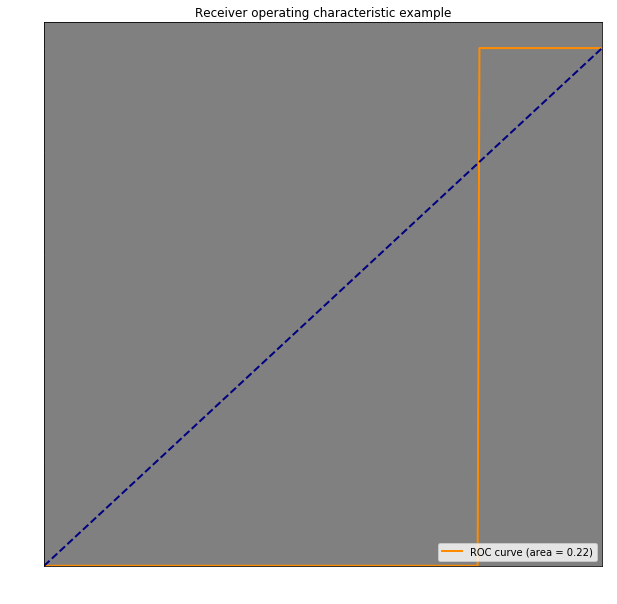

In [7]:
model_xgb = xgb.XGBRegressor(
    booster='gbtree',
#     objective='multi:softmax',
#     num_class= 2,
    colsample_bytree=0.8,
    gamma=0.1,
    learning_rate=0.02,
    max_depth=5,
#     n_estimators=500,
    min_child_weight=0.8,
#     reg_alpha=0,
#     reg_lambda=1,
    subsample=0.8,
    silent=1,
#     random_state=42,
    nthread=2)

# np_y_test = np.array(np_y_test)
model_xgb.fit(df_house_x, df_house_y)

Y_pred = model_xgb.predict(df_wf_x)
threshold = 0.5
y_pre = np.array([int(item>threshold) for  item in Y_pred])
print('accuracy_score',accuracy_score(df_wf_y, y_pre))
# normalize：默认值为True，返回正确分类的比例；如果为False，返回正确分类的样本数
print('accuracy_score',accuracy_score(df_wf_y, y_pre , normalize=False))
s2 = model_xgb.score(df_wf_x, df_wf_y)
print('s2',s2)

print(Y_pred)

# Y_pred.itemset(1, 2)
# Y_pred.itemset(0, 1)
# Y_pred.itemset(2, 0)
Y_pred = 1 - Y_pred
np_wf_y = np.array(df_wf_y)
np_wf_y.itemset(0, 1)

fpr,tpr,threshold = roc_curve(np_wf_y, Y_pred)
roc_auc = auc(fpr,tpr)
print('roc_auc',roc_auc)
print('fpr,tpr',fpr,tpr)
print('threshold',threshold.shape)

lw = 2
fig = plt.figure(figsize=(10,10))
ax=fig.add_subplot(111)
ax.set_facecolor('gray')
# ax.set_xlabel('fpr') 
# ax.set_ylabel('tpr') 

# 边框颜色
# ax.spines['bottom'].set_color('red') 
# ax.spines['top'].set_color('g') 
# 标签颜色
ax.xaxis.label.set_color('w') 
ax.yaxis.label.set_color('w') 

# 坐标轴颜色
ax.tick_params(axis='x', colors='w') 
ax.tick_params(axis='y', colors='w') 
# fig.patch.set_facecolor('black')

plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) ###假正率为横坐标，真正率为纵坐标做曲线
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


In [422]:
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.cm as cmx
import matplotlib
%matplotlib qt

x = df_wf_view['NL']
y = df_wf_view['GJJ']
z = df_wf_view['SB']
values = 1 - Y_pred
# from mpl_toolkits.mplot3d import Axes3D
def scatter3d(x,y,z, cs, colorsMap='jet'):
    cm = plt.get_cmap(colorsMap)
    cNorm = matplotlib.colors.Normalize(vmin=0, vmax=cs[-1])
    scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cm)
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.scatter(x, y, z, c=scalarMap.to_rgba(cs))
    scalarMap.set_array(cs)
    fig.colorbar(scalarMap)
    plt.show()
    
    
scatter3d(x,y,z,values)

In [10]:
# combine = [np_x_train, np_x_test]

In [345]:
# # Logistic Regression

# logreg = LogisticRegression(solver='lbfgs')
# logreg.fit(np_x_train, np_y_train)
# Y_pred = logreg.predict(np_x_test)
# acc_log = round(logreg.score(np_x_train, np_y_train) * 100, 2)


# print(acc_log)
# print(accuracy_score(np_y_test, Y_pred))

78.54
0.7880064492640557


In [12]:
# # Support Vector Machines

# svc = SVC()
# svc.fit(np_x_train, np_y_train)
# Y_pred = svc.predict(np_x_test)
# acc_svc = round(svc.score(np_x_train, np_y_train) * 100, 2)


# print(acc_svc)
# print(accuracy_score(np_y_test, Y_pred))

In [13]:
# knn = KNeighborsClassifier(n_neighbors = 3)
# knn.fit(np_x_train, np_y_train)
# Y_pred = knn.predict(np_x_test)
# acc_knn = round(knn.score(np_x_train, np_y_train) * 100, 2)


# print(acc_knn)
# print(accuracy_score(np_y_test, Y_pred))

In [14]:
# # Gaussian Naive Bayes

# gaussian = GaussianNB()
# gaussian.fit(np_x_train, np_y_train)
# Y_pred = gaussian.predict(np_x_test)
# acc_gaussian = round(gaussian.score(np_x_train, np_y_train) * 100, 2)


# print(acc_gaussian)
# print(accuracy_score(np_y_test, Y_pred))

In [15]:
# # Perceptron

# perceptron = Perceptron(max_iter=10,tol=1000)
# perceptron.fit(np_x_train, np_y_train)
# Y_pred = perceptron.predict(np_x_test)
# acc_perceptron = round(perceptron.score(np_x_train, np_y_train) * 100, 2)

# print(acc_perceptron)
# print(accuracy_score(np_y_test, Y_pred))

In [16]:
# # Linear SVC

# linear_svc = LinearSVC(max_iter=10000)
# linear_svc.fit(np_x_train, np_y_train)
# Y_pred = linear_svc.predict(np_x_test)
# acc_linear_svc = round(linear_svc.score(np_x_train, np_y_train) * 100, 2)

# print(acc_linear_svc)
# print(accuracy_score(np_y_test, Y_pred))

In [17]:
# # Stochastic Gradient Descent

# sgd = SGDClassifier(max_iter=1000,tol=None)
# sgd.fit(np_x_train, np_y_train)
# Y_pred = sgd.predict(np_x_test)
# acc_sgd = round(sgd.score(np_x_train, np_y_train) * 100, 2)

# print(acc_sgd)
# print(accuracy_score(np_y_test, Y_pred))

In [18]:
# # Decision Tree

# decision_tree = DecisionTreeClassifier()
# decision_tree.fit(np_x_train, np_y_train)
# Y_pred = decision_tree.predict(np_x_test)
# acc_decision_tree = round(decision_tree.score(np_x_train, np_y_train) * 100, 2)
# print(acc_decision_tree)
# print(accuracy_score(np_y_test, Y_pred))

In [19]:
# # Random Forest

# random_forest = RandomForestClassifier(n_estimators=100)
# random_forest.fit(np_x_train, np_y_train)
# Y_pred = random_forest.predict(np_x_test)
# random_forest.score(np_x_train, np_y_train)
# acc_random_forest = round(random_forest.score(np_x_train, np_y_train) * 100, 2)
# print(acc_random_forest)
# print(accuracy_score(np_y_test, Y_pred))

In [20]:
# models = pd.DataFrame({
#     'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
#               'Random Forest', 'Naive Bayes', 'Perceptron', 
#               'Stochastic Gradient Decent', 'Linear SVC', 
#               'Decision Tree'],
#     'Score': [acc_svc, acc_knn, acc_log, 
#               acc_random_forest, acc_gaussian, acc_perceptron, 
#               acc_sgd, acc_linear_svc, acc_decision_tree]})
# models.sort_values(by='Score', ascending=False)

In [21]:
# accuracy_score(np_y_test, Y_pred)

In [338]:
#单变量
X_scored = SelectKBest(score_func=f_regression, k='all').fit(df_house_x, df_house_y)
feature_scoring = pd.DataFrame({
        'feature': df_house_x.columns,
        'score': X_scored.scores_
    })
head_feature_num = 3
feat_scored_headnum = feature_scoring.sort_values('score', ascending=False).head(head_feature_num)['feature']
print(feat_scored_headnum)
# train_x_head = train_x[train_x.columns[train_x.columns.isin(feat_scored_headnum)]]
# X_scaled = pd.DataFrame(preprocessing.scale(train_x),columns = train_x.columns)

4    4
3    3
5    5
Name: feature, dtype: int64


In [123]:
#模型尝试
from sklearn.linear_model import ElasticNet, Lasso, BayesianRidge, LassoLarsIC, LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
import lightgbm as lgb

n_folds = 10


def rmsle_cv(model, df_house_x=df_house_x):
    kf = KFold(
        n_folds, shuffle=True, random_state=42).get_n_splits(df_house_x)
    rmse = -cross_val_score(
        model, df_house_x, df_house_y, scoring="neg_mean_squared_error", cv=kf)
    return (rmse)


svr = make_pipeline(SVR(kernel='linear'))

line = make_pipeline(LinearRegression())
lasso = make_pipeline(Lasso(alpha=0.0005, random_state=1))
ENet = make_pipeline(ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
KRR1 = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
KRR2 = KernelRidge(alpha=1.5, kernel='linear', degree=2, coef0=2.5)
#KRR3 = KernelRidge(alpha=0.6, kernel='rbf', degree=2, coef0=2.5)
# =============================================================================
# GBoost = GradientBoostingRegressor(n_estimators=5000, learning_rate=0.02,
#                                    max_depth=5, max_features=7,
#                                    min_samples_leaf=15, min_samples_split=10,
#                                    loss='huber', random_state =5)
# =============================================================================

model_xgb = xgb.XGBRegressor(
    booster='gbtree',
    objective='binary:logistic',
    colsample_bytree=0.8,
    gamma=0.1,
    learning_rate=0.02,
    max_depth=5,
    n_estimators=500,
    min_child_weight=0.8,
    reg_alpha=0,
    reg_lambda=1,
    subsample=0.8,
    silent=1,
    random_state=42,
    nthread=2)

# =============================================================================
# cv_params = {'min_child_weight': [0.05,0.1,0.15,0.2,0.25],
#              'learning_rate': [0.01, 0.02, 0.05, 0.1],
#              'max_depth': [3,5,7,9]}
#
# other_params = {'learning_rate': 0.02, 'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 0.8, 'seed': 0,
#                 'subsample': 0.8, 'colsample_bytree': 0.8, 'gamma': 0.5, 'reg_alpha': 0, 'reg_lambda': 1}
#
# model = xgb.XGBRegressor(**other_params)
# optimized_GBM = GridSearchCV(estimator=model, param_grid=cv_params, scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=4)
# optimized_GBM.fit(train_x, Y)
# evalute_result = optimized_GBM.grid_scores_
# print('每轮迭代运行结果:{0}'.format(evalute_result))
# print('参数的最佳取值：{0}'.format(optimized_GBM.best_params_))
# print('最佳模型得分:{0}'.format(optimized_GBM.best_score_))
# model_xgb = xgb.XGBRegressor(optimized_GBM.best_params_)
# =============================================================================
# =============================================================================
# model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
#                               learning_rate=0.05, n_estimators=720,
#                               max_bin = 55, bagging_fraction = 0.8,
#                               bagging_freq = 5, feature_fraction = 0.2319,
#                               feature_fraction_seed=9, bagging_seed=9,
#                               min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)
# =============================================================================

# =============================================================================
# parameters = {
#             'n_estimators':[300,600,900,1500,2500],
#             #'boosting':'dart',
#             'max_bin':[55,75,95],
#             'num_iterations':[50,100,250,400],
#              # 'max_features':[7,9,11,13],
#               'min_samples_leaf': [15, 25, 35, 45],
#               'learning_rate': [0.01, 0.03, 0.05, 0.1],
#               'num_leaves':[15,31,63],
#
#               'lambda_l2':[0,1]}  # 定义要优化的参数信息
# clf = GridSearchCV( model_lgb, parameters, n_jobs=3,scoring = 'neg_mean_squared_error' )
# clf.fit(train_x,Y)
# =============================================================================

#print('best n_estimators:', clf.best_params_)
#print('best cv score:', clf.score_)

score = rmsle_cv(svr)
print("\nSVR 得分: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
svr.fit(df_house_x, df_house_y)
score = rmsle_cv(line)
print("\nLine 得分: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmsle_cv(lasso)
print("\nLasso 得分: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmsle_cv(ENet)
print("ElasticNet 得分: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmsle_cv(KRR2)
print("Kernel Ridge2 得分: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
KRR2.fit(df_house_x, df_house_y)
#score = rmsle_cv(KRR3)
#print("Kernel Ridge3 得分: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
# =============================================================================
head_feature_num = 3
feat_scored_headnum = feature_scoring.sort_values(
    'score', ascending=False).head(head_feature_num)['feature']
train_x_head2 = df_house_x[df_house_x.columns[df_house_x.columns.isin(
    feat_scored_headnum)]]
X_scaled = pd.DataFrame(preprocessing.scale(df_house_x), columns=df_house_x.columns)
score = rmsle_cv(KRR1, train_x_head2)
print("Kernel Ridge1 得分: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
# score = rmsle_cv(GBoost)
# print("Gradient Boosting 得分: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
# =============================================================================
head_feature_num = 3
feat_scored_headnum = feature_scoring.sort_values(
    'score', ascending=False).head(head_feature_num)['feature']
train_x_head3 = df_house_x[df_house_x.columns[df_house_x.columns.isin(
    feat_scored_headnum)]]
X_scaled = pd.DataFrame(preprocessing.scale(df_house_x), columns=df_house_x.columns)
score = rmsle_cv(model_xgb, train_x_head3)
print("Xgboost 得分: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
model_xgb.fit(df_house_x, df_house_y)
# =============================================================================
# score = rmsle_cv(model_lgb)
# print("LGBM 得分: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))
# =============================================================================

KeyboardInterrupt: 

In [290]:
#简单模型融合
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # 遍历所有模型，你和数据
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        for model in self.models_:
            model.fit(X, y)

        return self
    
    # 预估，并对预估结果值做average
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        #return 0.85*predictions[:,0]+0.15*predictions[:,1]
        #return 0.7*predictions[:,0]+0.15*predictions[:,1]+0.15*predictions[:,2]
        return np.mean(predictions, axis=1)   
#averaged_models = AveragingModels(models = (lasso,KRR))    
averaged_models = AveragingModels(models = (svr,KRR2,model_xgb))

score = rmsle_cv(averaged_models)
print(" 对基模型集成后的得分: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

KeyboardInterrupt: 

In [47]:
score = rmsle_cv(line)
print("\nLine 得分: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
print(score.shape,score)


Line 得分: 0.2063 (0.0027)

(10,) [0.20747196 0.20531738 0.20717854 0.20532004 0.21116516 0.20749519
 0.20782353 0.20008052 0.20643603 0.20487538]


In [279]:
#备份
# score = rmsle_cv(KRR2)
# print("Kernel Ridge2 得分: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
# KRR2.fit(df_house_x, df_house_y)
# np_x_train, np_x_test, np_y_train, np_y_test 
# df_house_x df_house_y
# score = rmsle_cv(model_xgb, train_x_head3)
model_xgb = xgb.XGBRegressor(
    booster='gbtree',
#     objective='multi:softmax',
#     num_class= 2,
    colsample_bytree=0.8,
    gamma=0.1,
    learning_rate=0.02,
    max_depth=5,
#     n_estimators=500,
    min_child_weight=0.8,
#     reg_alpha=0,
#     reg_lambda=1,
    subsample=0.8,
    silent=1,
#     random_state=42,
    nthread=2)



# 'objective': 'multi:softmax',  # 多分类的问题
# 'num_class': 10,               # 类别数，与 multisoftmax 并用
# 'gamma': 0.1,                  # 用于控制是否后剪枝的参数,越大越保守，一般0.1、0.2这样子。
# 'max_depth': 12,               # 构建树的深度，越大越容易过拟合
# 'lambda': 2,                   # 控制模型复杂度的权重值的L2正则化项参数，参数越大，模型越不容易过拟合。
# 'subsample': 0.7,              # 随机采样训练样本
# 'colsample_bytree': 0.7,       # 生成树时进行的列采样
# 'min_child_weight': 3,
# 'silent': 1,                   # 设置成1则没有运行信息输出，最好是设置为0.
# 'eta': 0.007,                  # 如同学习率
# 'seed': 1000,
# 'nthread': 4,                  # cpu 线程数

np_y_test = np.array(np_y_test)
model_xgb.fit(np_x_train,np_y_train)

Y_pred = model_xgb.predict(df_house_x)
threshold = 0.5
y_pre = np.array([int(item>threshold) for  item in Y_pred])
# print(Y_pred.shape,type(Y_pred))
# print(df_house_y.shape,type(df_house_y))
print('accuracy_score',accuracy_score(df_house_y, y_pre))
# normalize：默认值为True，返回正确分类的比例；如果为False，返回正确分类的样本数
print('accuracy_score',accuracy_score(df_house_y, y_pre , normalize=False))
# print(np_y_test.shape,type(np_y_test))
# print(y_pre.shape,type(y_pre))

# print(np_y_test)
# print(y_pre)
# print(Y_pred)
# print(13625/27785)
s2 = model_xgb.score(df_house_x, df_house_y)
print('s2',s2)

# print(df_house_y)
# print(Y_pred)

fpr,tpr,threshold = roc_curve(df_house_y, Y_pred)
roc_auc = auc(fpr,tpr)
print('fpr,tpr',fpr,tpr)
print('roc_auc',roc_auc)
print('threshold',threshold.shape)

lw = 2
fig = plt.figure(figsize=(10,10))
ax=fig.add_subplot(111)
ax.set_facecolor('gray')
# ax.set_xlabel('fpr') 
# ax.set_ylabel('tpr') 

# 边框颜色
# ax.spines['bottom'].set_color('red') 
# ax.spines['top'].set_color('g') 
# 标签颜色
ax.xaxis.label.set_color('w') 
ax.yaxis.label.set_color('w') 

# 坐标轴颜色
ax.tick_params(axis='x', colors='w') 
ax.tick_params(axis='y', colors='w') 
# fig.patch.set_facecolor('black')

plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) ###假正率为横坐标，真正率为纵坐标做曲线
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


accuracy_score 0.7065682922440165
accuracy_score 19632
s2 0.22894203900318155
fpr,tpr [0.         0.         0.         ... 0.99859127 0.99946334 1.        ] [0.00000000e+00 7.76518093e-05 1.55303619e-04 ... 1.00000000e+00
 1.00000000e+00 1.00000000e+00]
roc_auc 0.7833160928293286
threshold (7376,)


In [201]:
print(type(np_x_test))

print(np.max(Y_pred))
print(np.min(Y_pred))

<class 'pandas.core.frame.DataFrame'>
0.91343355
0.04985529


In [202]:
df_house_view.shape

(27785, 3)

In [235]:
# Logistic Regression

logreg = LogisticRegression(solver='lbfgs')
logreg.fit(np_x_train, np_y_train)
Y_pred = logreg.predict(df_wf_x)
acc_log = round(logreg.score(df_wf_x, df_wf_y) * 100, 2)

# print(Y_pred.shape,type(Y_pred))
# print(df_house_y.shape,type(df_house_y))
print('acc_log', acc_log)
print('accuracy_score', accuracy_score(df_wf_y, Y_pred))
s2 = logreg.score(df_wf_x, df_wf_y)
s3 = model_xgb.score(np_x_test, np_y_test.reshape(-1, 1))
print(s2)
print(s3)

acc_log 73.55
accuracy_score 0.7354933923660025
0.7354933923660025
0.2192631603376212


In [116]:
import numpy as np
from sklearn import linear_model, datasets
# from sklearn.cross_validation import train_test_split

# 1.加载数据
iris = datasets.load_iris()
X = iris.data[:, :2]  # 使用前两个特征
Y = iris.target
#np.unique(Y)   # out: array([0, 1, 2])

# 2.拆分测试集、训练集。
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
# 设置随机数种子，以便比较结果。

# 3.标准化特征值
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# 4. 训练逻辑回归模型
logreg = linear_model.LogisticRegression(C=1e5)
logreg.fit(X_train, Y_train)

# 5. 预测
prepro = logreg.predict_proba(X_test_std)
pre = logreg.predict(X_test_std)
acc = logreg.score(X_test_std,Y_test)

print(acc)
# print(prepro.shape)
# print(pre.shape)
print(accuracy_score(pre, Y_test))

0.35555555555555557
0.35555555555555557


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
